In [1]:
%matplotlib inline
import numpy 
from matplotlib import pyplot 
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

$\frac{\partial u}{\partial t} + u.\triangledown u = - \frac{1}{\rho} \triangledown p + v \triangledown^2 u$

on non-dimensionalising it;

$Re(\frac{\partial u^*}{\partial t} + u^*. \triangledown u^*) = -\triangledown p^* + \triangledown^2 u^*$

To obtain the stokes flow, we assume that reynolds number approaches to zero.

$0 = -\triangledown p + \triangledown^2 u$

on applying curl operator on both sides of the equation:

$\triangledown \times 0 = \triangledown \times (-\triangledown p + \triangledown^2 u)$

the left hand side remains zero, while the first term on the right hand side is

$\triangledown \times -\triangledown p = 0$

Finally,


$\triangledown \times -\triangledown^2 u = \triangledown^2 \omega$

on simplification, we get;

$\triangledown^2 \omega = 0$

# Stream Function

$u = \frac{\partial \psi}{\partial y}$ and $v = -\frac{\partial \psi}{\partial x}$

in $2D$, we can write out the velocity as;

$\omega = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}$

on combining, the previous equation yields another equation;

$\triangledown^2 = - \omega$

At a very low Reynolds numbers,

$\triangledown^2 \omega = 0$

$\triangledown^2 \psi = - \omega$

on substituting, we arrive to new equation,

$\triangledown^4 \psi = 0$

In [2]:
# initial conditions;

nx = 41
ny = 41

l = 1.
h = 1.

x = numpy.linspace(0,l,nx)
y = numpy.linspace(0,h,ny)

dx = l/(nx-1)
dy = h/(ny-1)

w1 = numpy.zeros((nx,ny))
p1 = numpy.zeros((nx,ny))

l1_target = 1e-6

u = 1

In [3]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [4]:
def stokes(w,p,dy,u,l1_target):
    
    l1norm = 1
    
    wn = numpy.empty_like(w)
    pn = numpy.empty_like(p)
    
    iterations = 0
    
    while l1norm > l1_target:
        
        wn = w.copy()
        pn = p.copy()
        
        w[1:-1,1:-1] = .25 * (wn[1:-1,2:] + wn[1:-1, :-2] \
                              + wn[2:, 1:-1] + wn[:-2,1: -1])
        
        p[1:-1,1:-1] = .25 * (pn[1:-1,2:] + pn[1:-1, :-2] \
                              + pn[2:, 1:-1] + pn[:-2, 1:-1] + wn[1:-1,1:-1]*dy**2)
        
        #Boundary conditions
        
        w[1:-1,0]  = -1/(2*dy**2)*(8*p[1:-1,1] - p[1:-1,2])
        w[1:-1,-1] = -1/(2*dy**2)*(8*p[1:-1,-2] - p[1:-1,-3])
        w[0,1:-1]  = -1/(2*dy**2)*(8*p[1,1:-1] - p[2,1:-1])
        w[-1,1:-1] = -1/(2*dy**2)*(8*p[-2,1:-1] - p[-3,1:-1])-3*u/dy
        
        l1norm = max(L1norm(w,wn),L1norm(p,pn))
        
        iterations += 1
       
    return w,p
    

In [5]:
w,p = stokes(w1.copy(), p1.copy(),dy,u, l1_target)

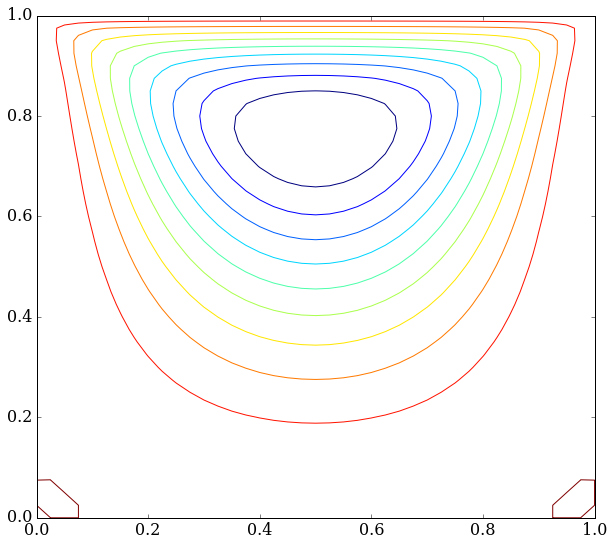

In [6]:
pyplot.figure(figsize = (10,9))
pyplot.contour(x,y,p,10)

In [10]:
print (numpy.max(p))
print (numpy.max(w))

2.20482440188e-06
36.1967433535
